### Try out with different foreground and background images of your choice and show the results.

In [7]:
%matplotlib inline

import cv2
import numpy
from collections import Counter
from PIL import Image
from matplotlib import pyplot as plt

In [8]:
def color(img):
    d = img.shape
    a = []

    for i in range(0, d[0]):
        for j in range(0, d[1]):
            a.append(tuple(numpy.array(img[i,j,:])))

    f = tuple(a)

    most_common,num_most_common = Counter(f).most_common(1)[0]

    return most_common

In [9]:
img1 = cv2.imread('./DIP_2019_A1/dicaprio.jpg')
img2 = cv2.imread('./DIP_2019_A1/bg.jpg')

In [10]:
def mergeImage(fg, bg):
    a = color(fg)
    d2 = bg.shape
    
    for i in range(0, d2[0]):
        for j in range(0, d2[1]):
            if fg[i,j,2] < a[2]+100 and fg[i,j,2] > a[2]-100 and fg[i,j,1] > a[1]-100 and fg[i,j,1] < a[1]+100 and fg[i,j,0] < a[0]+100 and fg[i,j,0] > a[0]-100:
                fg[i,j] = bg[i,j]
                
    return fg

In [11]:
img = mergeImage(img1, img2)

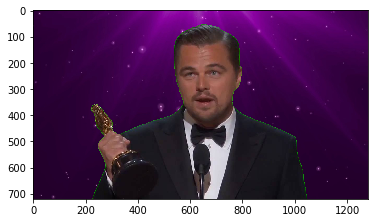

In [12]:
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

plt.imshow(rgb_img)
plt.show()